## Loading the environments

In [8]:
import os
from dotenv import load_dotenv
load_dotenv()

True

## Importing the packages

In [9]:
from dotenv import load_dotenv
from langchain.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from IPython.display import Image, display
from langgraph.graph import StateGraph , START , END , MessageGraph 
from langchain_core.messages import HumanMessage , AIMessage , SystemMessage
from typing import TypedDict
from typing import Annotated
from langgraph.graph.message import add_messages

import datetime

In [10]:
model = ChatOpenAI(model="gpt-4.1-mini", temperature=0)

## Some utility functions

In [11]:
# to display the graph
def display_graph(app):
    # this function will display the graph of the app
    try:
        display(Image(app.get_graph().draw_mermaid_png()))
    except Exception as e:
        # This requires some extra dependencies and is optional
        print(e)



# To stream the output of the app
def stream_output(app, input):
    for output in app.stream(input):
        for key,value in output.items():
            print(f"here is output from {key}")
            print("_______")
            print(value)
            print("\n")

In [12]:
#defining the state
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [13]:
model.invoke("What is the weather in hyderabad?")

AIMessage(content="I don't have real-time access to current weather data. To get the latest weather information for Hyderabad, you can check a reliable weather website or app like Weather.com, AccuWeather, or use a voice assistant on your device.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 15, 'total_tokens': 61, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_658b958c37', 'id': 'chatcmpl-C00b9qizTQcJOET5WqPIibiM5aaTZ', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--ed950d37-f519-44a5-a64f-e3433b0c72d7-0', usage_metadata={'input_tokens': 15, 'output_tokens': 46, 'total_tokens': 61, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'a

## Part 1: Access to tools

In [14]:
# tavily seaarch tool ---> for api go to https://app.tavily.com/home and generate an api key
from langchain_tavily import TavilySearch

search_tool=TavilySearch(max_results=2)
search_tool.invoke("What is langgraph")


{'query': 'What is langgraph',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.datacamp.com/tutorial/langgraph-tutorial',
   'title': 'LangGraph Tutorial: What Is LangGraph and How to Use It?',
   'content': 'LangGraph is a library within the LangChain ecosystem that provides a framework for defining, coordinating, and executing multiple LLM agents (or chains) in a structured and efficient manner. By managing the flow of data and the sequence of operations, LangGraph allows developers to focus on the high-level logic of their applications rather than the intricacies of agent coordination. Whether you need a chatbot that can handle various types of user requests or a multi-agent system that performs complex tasks, LangGraph provides the tools to build exactly what you need. LangGraph significantly simplifies the development of complex LLM applications by providing a structured framework for managing state and coordinating agent interaction

In [15]:
search_tool.invoke("What is the weather in hyderabad?")

{'query': 'What is the weather in hyderabad?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'Weather in Hyderabad',
   'url': 'https://www.weatherapi.com/',
   'content': "{'location': {'name': 'Hyderabad', 'region': 'Telangana', 'country': 'India', 'lat': 17.3753, 'lon': 78.4744, 'tz_id': 'Asia/Kolkata', 'localtime_epoch': 1754117728, 'localtime': '2025-08-02 12:25'}, 'current': {'last_updated_epoch': 1754117100, 'last_updated': '2025-08-02 12:15', 'temp_c': 30.1, 'temp_f': 86.2, 'is_day': 1, 'condition': {'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/day/116.png', 'code': 1003}, 'wind_mph': 9.6, 'wind_kph': 15.5, 'wind_degree': 299, 'wind_dir': 'WNW', 'pressure_mb': 1009.0, 'pressure_in': 29.8, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 59, 'cloud': 50, 'feelslike_c': 31.0, 'feelslike_f': 87.9, 'windchill_c': 31.7, 'windchill_f': 89.1, 'heatindex_c': 33.5, 'heatindex_f': 92.4, 'dewpoint_c': 18.6, 'dewpoint_f': 65.6, 

## lets create 6 tools

In [16]:

#defining search tool
search_tool = TavilySearch(max_results=2)


def search_web(user_question):
    """
    This function will search a web search for the user question
    Args:
        user_question (str): The question to search
    Returns:
        search_results (list): The search results
    """
    search_results = search_tool.invoke(user_question)["results"]
    return search_results

#mathematical tool - addition
def add_numbers(a,b):
    """
    This function will add two numbers
    Args:
        a (int): The first number
        b (int): The second number
    Returns:
        result (int): The sum of the two numbers
    """
    return a+b

#mathematical tool - subtraction
def subtract_numbers(a,b):
    """
    This function will subtract two numbers
    Args:
        a (int): The first number
        b (int): The second number
    Returns:
        result (int): The difference of the two numbers
    """
    return a-b

#mathematical tool - multiplication
def multiply_numbers(a,b):
    """
    This function will multiply two numbers
    Args:
        a (int): The first number
        b (int): The second number
    Returns:
        result (int): The product of the two numbers
    """
    return a*b

#mathematical tool - division
def divide_numbers(a,b):
    """
    This function will divide two numbers
    Args:
        a (int): The first number
        b (int): The second number
    Returns:
        result (int): The quotient of the two numbers
    """
    return a/b


# tooll to get the current time
def get_current_time():
    """
    This function will get the current time
    Returns:
        result (str): The current time
    """
    return datetime.now().strftime("%H:%M:%S")


In [17]:
tools_list = [search_web, add_numbers, subtract_numbers, multiply_numbers, divide_numbers, get_current_time]

In [18]:
#bind the tools with llm
llm_with_tool = model.bind_tools(tools_list)

In [19]:
llm_with_tool

RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x10bb1c910>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x10bb1cf50>, root_client=<openai.OpenAI object at 0x10bb1c2d0>, root_async_client=<openai.AsyncOpenAI object at 0x10bb1c050>, model_name='gpt-4.1-mini', temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'search_web', 'description': 'This function will search a web search for the user question\nArgs:\n    user_question (str): The question to search\nReturns:\n    search_results (list): The search results', 'parameters': {'properties': {'user_question': {}}, 'required': ['user_question'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'add_numbers', 'description': 'This function will add two numbers\nArgs:\n    a (int): The first number\n    b (int): The second number\nReturns:\n  

In [21]:
#defining the nodes 
def tool_calling_llm(state:State):
    return {"messages": [llm_with_tool.invoke(state["messages"])]}



In [22]:
# define the workflow
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

workflow = StateGraph(State)

workflow.add_node("llm_with_tools", tool_calling_llm)
workflow.add_node("tools" , ToolNode(tools_list))

workflow.add_edge(START, "llm_with_tools")
workflow.add_conditional_edges(
    "llm_with_tools",
    tools_condition
)
workflow.add_edge("tools", END)

app = workflow.compile()

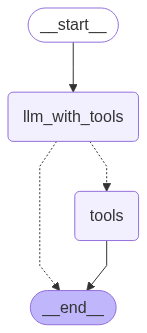

In [23]:
display_graph(app)

In [24]:
response = app.invoke({"messages": "What is the current tariff put by USA on india?"})

In [25]:
response

{'messages': [HumanMessage(content='What is the current tariff put by USA on india?', additional_kwargs={}, response_metadata={}, id='472a40dc-c937-477a-9d37-9dcd411116e6'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_YvWYO1lArUJZu10SoFK45Qfa', 'function': {'arguments': '{"user_question":"current tariff put by USA on India"}', 'name': 'search_web'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 350, 'total_tokens': 371, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_658b958c37', 'id': 'chatcmpl-C00gked8eO6C3yy0J5IQ75xNas6Wo', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--5b0d3223-ad56-497d-9c83-27fc1f7785c8-0', tool_calls=[{'nam

In [26]:
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the current tariff put by USA on india?
================================== Ai Message ==================================
Tool Calls:
  search_web (call_YvWYO1lArUJZu10SoFK45Qfa)
 Call ID: call_YvWYO1lArUJZu10SoFK45Qfa
  Args:
    user_question: current tariff put by USA on India
================================= Tool Message =================================
Name: search_web

[{"url": "https://apnews.com/article/trump-tariffs-russia-india-9e388a55583e7007149819c52f0fd71b", "title": "Trump announces 25% tariff on India starting Aug. 1 - AP News", "content": "WASHINGTON (AP) — The United States will impose a 25% tariff on goods from India, plus an additional import tax because of India's purchasing", "score": 0.76512027, "raw_content": null}, {"url": "https://thediplomat.com/2025/08/trumps-tariffs-on-india-imperil-india-us-strategic-relationship/", "title": "Trump's Tariffs on India Imperil India-US

In [ ]:
response=app.invoke({"messages":"What is 5 multiplied by 4"})
for m in response['messages']:
    m.pretty_print()

In [ ]:
## this is something to note about 
response=app.invoke({"messages":"What is 5 multiplied by 4 and where is taj mahal"})
for m in response['messages']:
    m.pretty_print()

## Part 2: Improving the workflow by passing the tools output back to llm - ReACT agent

In [27]:
# define the workflow
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

workflow = StateGraph(State)

workflow.add_node("llm_with_tools", tool_calling_llm)
workflow.add_node("tools" , ToolNode(tools_list))

workflow.add_edge(START, "llm_with_tools")
workflow.add_conditional_edges(
    "llm_with_tools",
    tools_condition
)
workflow.add_edge("tools", "llm_with_tools")

app2 = workflow.compile()

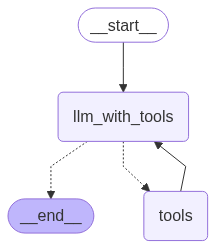

In [28]:
display_graph(app2)

In [29]:
response=app2.invoke({"messages":"What is 5 multiplied by 4 and where is taj mahal"})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is 5 multiplied by 4 and where is taj mahal
================================== Ai Message ==================================
Tool Calls:
  multiply_numbers (call_0ezfJDkfDQgvYAmb2INCtRZZ)
 Call ID: call_0ezfJDkfDQgvYAmb2INCtRZZ
  Args:
    a: 5
    b: 4
  search_web (call_nlb80dDbtATnVy2S8VvEiEaC)
 Call ID: call_nlb80dDbtATnVy2S8VvEiEaC
  Args:
    user_question: Where is Taj Mahal located?
================================= Tool Message =================================
Name: multiply_numbers

20
================================= Tool Message =================================
Name: search_web

[{"url": "https://whc.unesco.org/en/list/252/", "title": "Taj Mahal - UNESCO World Heritage Centre", "content": "It was built by Mughal Emperor Shah Jahan in memory of his wife Mumtaz Mahal with construction starting in 1632 AD and completed in 1648 AD, with the mosque, the guest house and the main gateway on t

In [30]:
app2.invoke({"messages":"What is 5 multiplied by 4 and where is taj mahal"})

{'messages': [HumanMessage(content='What is 5 multiplied by 4 and where is taj mahal', additional_kwargs={}, response_metadata={}, id='65f7cbc5-8350-45b0-a5e5-5d25caa688c5'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_5KDN2PSYTHC55tsKy5tDra0n', 'function': {'arguments': '{"a": 5, "b": 4}', 'name': 'multiply_numbers'}, 'type': 'function'}, {'id': 'call_n1Tdlhm4ZiTwcfvLMNmtZVDR', 'function': {'arguments': '{"user_question": "Where is Taj Mahal located?"}', 'name': 'search_web'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 54, 'prompt_tokens': 352, 'total_tokens': 406, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_658b958c37', 'id': 'chatcmpl-C00nOGT5ad3eNXcp1gfuqNIZost7x', 'service_tier

In [ ]:
app2.invoke({"messages":"What is 5 multiplied by 4 and add 15 to it"})

## Part 3: Inbuilt ReACT agent by langgraph

In [31]:
from langgraph.prebuilt import create_react_agent

In [32]:
react_agent = create_react_agent(
    model=model,
    tools=tools_list
)


In [33]:
react_agent.invoke({"messages":"What is 5 multiplied by 4 and where is taj mahal"})

{'messages': [HumanMessage(content='What is 5 multiplied by 4 and where is taj mahal', additional_kwargs={}, response_metadata={}, id='cccb4e52-f642-4cd9-a246-7dd9758b7a37'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_bzqlnRFhyUvH6Jut6pyFHnya', 'function': {'arguments': '{"a": 5, "b": 4}', 'name': 'multiply_numbers'}, 'type': 'function'}, {'id': 'call_41zCFQVftEBgOtIv5ZyHSSAm', 'function': {'arguments': '{"user_question": "Where is Taj Mahal located?"}', 'name': 'search_web'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 54, 'prompt_tokens': 352, 'total_tokens': 406, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_658b958c37', 'id': 'chatcmpl-C00oYNeD826R857sbKg7kU0k4mwQX', 'service_tier

## Part 4 : Memory in langgraphs

In [34]:
app2.invoke({"messages":"Hey my name is Javed"})

{'messages': [HumanMessage(content='Hey my name is Javed', additional_kwargs={}, response_metadata={}, id='be747de2-0f65-4175-ab86-d34a3e575e45'),
  AIMessage(content='Hello Javed! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 345, 'total_tokens': 357, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_658b958c37', 'id': 'chatcmpl-C00rXTwYSeeHup4rg1hn09AEdGzmC', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--7d51ba25-af98-4654-9f88-508a300293d9-0', usage_metadata={'input_tokens': 345, 'output_tokens': 12, 'total_tokens': 357, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [35]:
app2.invoke({"messages":"Hey what is my name"})

{'messages': [HumanMessage(content='Hey what is my name', additional_kwargs={}, response_metadata={}, id='59f49e2f-a2ff-43c1-b841-2ccd80694fed'),
  AIMessage(content="I don't have access to your personal information, so I don't know your name. If you'd like, you can tell me your name!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 344, 'total_tokens': 372, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_658b958c37', 'id': 'chatcmpl-C00re5rt2vb8bycESpaSAd4CYe3iG', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--5d7442c8-c3dc-46af-b4ee-b5436c141ecc-0', usage_metadata={'input_tokens': 344, 'output_tokens': 28, 'total_tokens': 372, 'input_token_details': {'audio': 0, 'c

In [36]:
# define the workflow
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

workflow = StateGraph(State)

workflow.add_node("llm_with_tools", tool_calling_llm)
workflow.add_node("tools" , ToolNode(tools_list))

workflow.add_edge(START, "llm_with_tools")
workflow.add_conditional_edges(
    "llm_with_tools",
    tools_condition
)
workflow.add_edge("tools", "llm_with_tools")

app3 = workflow.compile(checkpointer=memory)

In [37]:
config={"configurable":{"thread_id":"1"}}
response=app3.invoke({"messages":"Hi my name is Javed"},config=config)
print(response["messages"][-1].content)

Hello Javed! How can I assist you today?


In [38]:
response=app3.invoke({"messages":"hey what is my name"},config=config)
print(response["messages"][-1].content)

Your name is Javed. How can I help you further?


## Part 5 : Streaming in Langgraph

Methods: .stream() and astream()

These methods are sync and async methods for streaming back results.
Additional parameters in streaming modes for graph state

values : This streams the full state of the graph after each node is called. \
updates : This streams updates to the state of the graph after each node is called.


In [39]:
# Create a thread
config = {"configurable": {"thread_id": "2"}}

for chunk in app3.stream({'messages':"Hi,My name is Javed And I like cricket"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Javed And I like cricket', additional_kwargs={}, response_metadata={}, id='70d1af26-9921-4f6a-a7bd-ab51558b1e5d')]}
{'messages': [HumanMessage(content='Hi,My name is Javed And I like cricket', additional_kwargs={}, response_metadata={}, id='70d1af26-9921-4f6a-a7bd-ab51558b1e5d'), AIMessage(content="Hi Javed! It's great to meet you. Cricket is a fantastic sport. Do you have a favorite team or player?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 350, 'total_tokens': 376, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_658b958c37', 'id': 'chatcmpl-C00xWGALK66E3fKlZciv6VNtvGpOs', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, 

In [40]:
# Create a thread
config = {"configurable": {"thread_id": "2"}}

for chunk in app3.stream({'messages':"oh i love movies too"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Javed And I like cricket', additional_kwargs={}, response_metadata={}, id='70d1af26-9921-4f6a-a7bd-ab51558b1e5d'), AIMessage(content="Hi Javed! It's great to meet you. Cricket is a fantastic sport. Do you have a favorite team or player?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 350, 'total_tokens': 376, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_658b958c37', 'id': 'chatcmpl-C00xWGALK66E3fKlZciv6VNtvGpOs', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--f86bc762-f6d4-45fb-b7b9-600774b51753-0', usage_metadata={'input_tokens': 350, 'output_tokens': 26, 'total_tokens': 376, 'input_token_details': {'audio': 0, '

In [41]:
# using updates method : only the recent values are reflected
# Create a thread
config = {"configurable": {"thread_id": "3"}}

for chunk in app3.stream({'messages':"Hi,My name is Javed And I like cricket"},config,stream_mode="updates"):
    print(chunk)

{'llm_with_tools': {'messages': [AIMessage(content="Hi Javed! It's great to meet you. Cricket is a fantastic sport. Do you have a favorite team or player? Or maybe you play cricket yourself?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 33, 'prompt_tokens': 350, 'total_tokens': 383, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_658b958c37', 'id': 'chatcmpl-C00yNoguqncMvk9osTepLEv6rdPKC', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--b9054fa4-c51a-4cd7-9a20-e3fd4b276ee2-0', usage_metadata={'input_tokens': 350, 'output_tokens': 33, 'total_tokens': 383, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}


In [42]:
config = {"configurable": {"thread_id": "3"}}

for chunk in app3.stream({'messages':"oh i love movies too"},config,stream_mode="updates"):
    print(chunk)

{'llm_with_tools': {'messages': [AIMessage(content="That's awesome, Javed! Movies are a great way to relax and enjoy some storytelling. What kind of movies do you like? Any favorite genres or films?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 33, 'prompt_tokens': 395, 'total_tokens': 428, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_6f2eabb9a5', 'id': 'chatcmpl-C00yZMKqq4kHKcU7mZP3YCTPmwhMA', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--52ba2f73-f8ef-4723-94b3-d24b696bbe16-0', usage_metadata={'input_tokens': 395, 'output_tokens': 33, 'total_tokens': 428, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}


In [43]:
config = {"configurable": {"thread_id": "4"}}

async for event in app3.astream_events({"messages":["Hi My name is Javed and I like to play cricket"]},config,version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi My name is Javed and I like to play cricket']}}, 'name': 'LangGraph', 'tags': [], 'run_id': '5e5d6163-775b-4e8e-a00c-437e9a01e147', 'metadata': {'thread_id': '4'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi My name is Javed and I like to play cricket', additional_kwargs={}, response_metadata={}, id='99304898-6107-4ca6-93a5-5f70c2a53249')]}}, 'name': 'llm_with_tools', 'tags': ['graph:step:1'], 'run_id': '1a6ce55d-8451-4de7-8b69-c918230ac66f', 'metadata': {'thread_id': '4', 'langgraph_step': 1, 'langgraph_node': 'llm_with_tools', 'langgraph_triggers': ('branch:to:llm_with_tools',), 'langgraph_path': ('__pregel_pull', 'llm_with_tools'), 'langgraph_checkpoint_ns': 'llm_with_tools:27b36710-00bd-9b15-1882-1bb449dc1180'}, 'parent_ids': ['5e5d6163-775b-4e8e-a00c-437e9a01e147']}
{'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='Hi My n

## Part 6 : Human In the loop

In [44]:
from typing import Annotated

from langchain_tavily import TavilySearch
from typing_extensions import TypedDict
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition

from langchain_core.tools import tool
from langgraph.types import Command, interrupt

class State(TypedDict):
    messages: Annotated[list, add_messages]

model = ChatOpenAI(model="gpt-4.1-mini", temperature=0)

memory = MemorySaver()

@tool
def human_assistance(query: str) -> str:
    """Request assistance from a human."""
    human_response = interrupt({"query": query})
    return human_response["data"]

search_tool = TavilySearch(max_results=2)
tool_list = [search_tool, human_assistance]
llm_with_tools = model.bind_tools(tool_list)

def tool_calling_llm(state: State):
    message = llm_with_tools.invoke(state["messages"])
    return {"messages": [message]}


workflow  = StateGraph(State)
workflow.add_node("llm_with_tools", tool_calling_llm)
workflow.add_node("tools", ToolNode(tools=tool_list))

workflow.add_edge(START, "llm_with_tools")
workflow.add_conditional_edges(
    "llm_with_tools",
    tools_condition,
)
workflow.add_edge("tools", "llm_with_tools")

app_human = workflow.compile(
    checkpointer=memory,
    interrupt_before=["tools"])

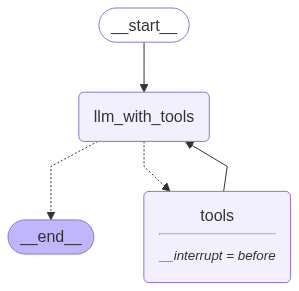

In [45]:
display(app_human)

In [46]:
from langchain_core.messages import HumanMessage

config = {"configurable": {"thread_id": "1"}}
input_message = HumanMessage(content="Hello, I am John")

app_human.invoke({"messages": input_message}, config=config)

{'messages': [HumanMessage(content='Hello, I am John', additional_kwargs={}, response_metadata={}, id='be71b89b-2972-4dca-8ced-3801689819f8'),
  AIMessage(content='Hello John! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 1294, 'total_tokens': 1305, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 1280}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_6f2eabb9a5', 'id': 'chatcmpl-C01261jur0sbzwrjANfMZ3ajD8SQf', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--b3a013ee-4d9c-4fb6-9909-f65cdf828a4d-0', usage_metadata={'input_tokens': 1294, 'output_tokens': 11, 'total_tokens': 1305, 'input_token_details': {'audio': 0, 'cache_read': 1280}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [47]:
config = {"configurable": {"thread_id": "100"}}
input_message = HumanMessage(content="Sorry, did I already introduce myself?")

app_human.invoke({"messages": input_message}, config=config)

{'messages': [HumanMessage(content='Sorry, did I already introduce myself?', additional_kwargs={}, response_metadata={}, id='f14e73c8-d709-4fb3-a981-99a872062cd1'),
  AIMessage(content="No, you haven't introduced yourself yet. Would you like to introduce yourself now?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 1297, 'total_tokens': 1314, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 1280}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_6f2eabb9a5', 'id': 'chatcmpl-C012QMo5f0jZRmRUBxeZmK7gqP094', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--a3d62c29-ed1a-4659-a05b-f21425868002-0', usage_metadata={'input_tokens': 1297, 'output_tokens': 17, 'total_tokens': 1314, 'input_token_details': {'audio': 0, 'cache_read'

In [48]:
config = {"configurable": {"thread_id": "1"}}
input_message = HumanMessage(content="Sorry, did I already introduce myself?")

app_human.invoke({"messages": input_message}, config=config)

{'messages': [HumanMessage(content='Hello, I am John', additional_kwargs={}, response_metadata={}, id='be71b89b-2972-4dca-8ced-3801689819f8'),
  AIMessage(content='Hello John! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 1294, 'total_tokens': 1305, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 1280}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_6f2eabb9a5', 'id': 'chatcmpl-C01261jur0sbzwrjANfMZ3ajD8SQf', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--b3a013ee-4d9c-4fb6-9909-f65cdf828a4d-0', usage_metadata={'input_tokens': 1294, 'output_tokens': 11, 'total_tokens': 1305, 'input_token_details': {'audio': 0, 'cache_read': 1280}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),


In [49]:

from langchain_core.messages import HumanMessage

config = {"configurable": {"thread_id": "1"}}
input_message = HumanMessage(content="I want to invest in apple stock. how is the stock price?")

app_human.invoke({"messages": input_message}, config=config)

{'messages': [HumanMessage(content='Hello, I am John', additional_kwargs={}, response_metadata={}, id='be71b89b-2972-4dca-8ced-3801689819f8'),
  AIMessage(content='Hello John! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 1294, 'total_tokens': 1305, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 1280}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_6f2eabb9a5', 'id': 'chatcmpl-C01261jur0sbzwrjANfMZ3ajD8SQf', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--b3a013ee-4d9c-4fb6-9909-f65cdf828a4d-0', usage_metadata={'input_tokens': 1294, 'output_tokens': 11, 'total_tokens': 1305, 'input_token_details': {'audio': 0, 'cache_read': 1280}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),


In [50]:
snapshot = app_human.get_state(config)
snapshot.next

('tools',)

In [51]:
app_human.invoke(None, config=config)

{'messages': [HumanMessage(content='Hello, I am John', additional_kwargs={}, response_metadata={}, id='be71b89b-2972-4dca-8ced-3801689819f8'),
  AIMessage(content='Hello John! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 1294, 'total_tokens': 1305, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 1280}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_6f2eabb9a5', 'id': 'chatcmpl-C01261jur0sbzwrjANfMZ3ajD8SQf', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--b3a013ee-4d9c-4fb6-9909-f65cdf828a4d-0', usage_metadata={'input_tokens': 1294, 'output_tokens': 11, 'total_tokens': 1305, 'input_token_details': {'audio': 0, 'cache_read': 1280}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),


In [ ]:
#extra

In [52]:
config = {"configurable": {"thread_id": "1"}}
user_input = "I need some expert guidance and assistance for building an AI agent"

for chunk in app_human.stream({'messages':user_input},config,stream_mode="values"):
    if "messages" in chunk:
        chunk["messages"][-1].pretty_print()


================================ Human Message =================================

I need some expert guidance and assistance for building an AI agent
================================== Ai Message ==================================

I can help you with that! To provide the best guidance and assistance for building an AI agent, could you please share more details about your project? For example:

- What is the purpose or goal of the AI agent?
- What kind of tasks do you want the AI agent to perform?
- Do you have any preferred technologies, platforms, or programming languages in mind?
- Are you looking for help with design, development, training, deployment, or all stages?
- Any specific challenges or requirements you have?

The more information you provide, the better I can assist you.


In [53]:
human_response = (
    "We, the experts are here to help! We'd recommend you check out LangGraph to build your agent."
    " It's much more reliable and extensible than simple autonomous agents."
)

human_command = Command(resume={"data": human_response})

events = app_human.stream(human_command, config, stream_mode="values")
for event in events:
    print(event)

{'messages': [HumanMessage(content='Hello, I am John', additional_kwargs={}, response_metadata={}, id='be71b89b-2972-4dca-8ced-3801689819f8'), AIMessage(content='Hello John! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 1294, 'total_tokens': 1305, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 1280}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_6f2eabb9a5', 'id': 'chatcmpl-C01261jur0sbzwrjANfMZ3ajD8SQf', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--b3a013ee-4d9c-4fb6-9909-f65cdf828a4d-0', usage_metadata={'input_tokens': 1294, 'output_tokens': 11, 'total_tokens': 1305, 'input_token_details': {'audio': 0, 'cache_read': 1280}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), Hu

In [ ]:
## good tutorial 
# https://github.com/Coding-Crashkurse/LangGraph-Tutorial/blob/main/human_in_loop.ipynb